In [1]:
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline
from IPython.core.display import HTML
HTML( open('my_css.css').read() ) # if you don't have my_css.css, comment this line out

v1.2, 22 May 2017, by Brian Fiedler

In this notebook, I will attempt to further distill the essential quantitative measures for forecast verification 
as found at this:
[Australian web site](http://www.cawcr.gov.au/projects/verification/).

For our exercise at calculating the skill of forecasts we use:
[Verifying probability of precipitation - an example from Finland](http://www.cawcr.gov.au/projects/verification/POP3/POP3.html)

Which offers this [precipitation forecast data from Finland](http://www.cawcr.gov.au/projects/verification/POP3/POP_3cat_2003.txt)

Your [Student Tasks](#Student-Tasks) are at the end of this notebook, below the red line.


# Brier Score

from page 4 of [this document](http://www.swpc.noaa.gov/sites/default/files/images/u30/Ensemble%20Forecast%20Verification.pdf):

<img src="http://metr4330.net/img/BrierScore.png">

In [2]:
def BS(po, percent=False): # Brier Score 
    ss = 0. # sum of square differences
    n=0
    for p in po.keys(): # p is a probability
        for o in po[p]: # po[p] is a list of 1's and 0's
            if percent:
                ss += (p/100.-o)**2 # convert percent probabilty to conventional probability 
            else:
                ss += (p-o)**2
            n += 1
    return ss/n       

Suppose, say at noon, we forecast for the occurrence of rain in the subsequent day.  The verification observations from the following day are indicated by 1 for rain, 0 for no rain.  Here is some bogus data to demonstrate the Brier Score.

 * In `notsuref`, the forecast PoP is either 30% or 80%.  Those PoP are not too far off from the observed frequency.  (You can experiment with making the frequency exact).
 * In `perfectf`, PoP is either 0% or 100%, and all forecasts verify perfectly.
 * In `climof`, the forecaster knows from previous data that rain occurs 0.5822 percent of the time.  Lo and behold, the next seventeen days have $\ob$ exactly the climatological frequency, which makes this climatological forecast not too bad.
 * In `reliablef` the PoP is exactly equal to the observed frequency. BS improves slightly on `notsuref` and `climof`
 
Note the 1s and 0s in the lists below are not necessarily in a time order.

In [3]:
notsuref = { 0.3 : [1,0,1,0,0,0,0,0,1,1] , 0.8 : [1,1,1,1,0,1,1]}
print ("The Brier score for notsuref is",  '%0.4f' % BS(notsuref) )

The Brier score for notsuref is 0.1988


In [4]:
perfectf = {0.0 : [0,0,0,0,0,0,0] , 1.0 : [1,1,1,1,1,1,1,1,1,1]}
print ("The Brier score for perfectf is",  '%0.4f' % BS(perfectf) )

The Brier score for perfectf is 0.0000


In [5]:
climof = { 0.5882 : [1,0,1,0,0,0,0,0,1,1,1,1,1,1,0,1,1 ] }
print ("The Brier score for climof is",  '%0.4f' % BS(climof) )

The Brier score for climof is 0.2422


In [6]:
reliablef = { 0.4 : [1,0,1,0,0,0,0,0,1,1] , 0.875 : [1,1,1,1,0,1,1]}
print ("The Brier score for reliablef is",  '%0.4f' % BS(reliablef) )

The Brier score for reliablef is 0.1917


from page 7 of [this document](http://www.swpc.noaa.gov/sites/default/files/images/u30/Ensemble%20Forecast%20Verification.pdf):

<img src="http://metr4330.net/img/BrierScoreComponents.png">



## Derivation of Brier score decomposition

Note that Wilks punts on the derivation in his 7.4.3 and says "After some algebra, ...". 

Well here it is! The "some algebra"!

$\newcommand{ob}{\overline{o}}$  $\newcommand{obk}{\overline{o}_k}$ $\newcommand{oki}{o_{ki}}$
\begin{eqnarray}
\mathbf{BS} &=& \frac{1}{N} \sum_{i=1}^N (p_i-o_i)^2
\end{eqnarray}

Let's group the $o_i$ with one particular value of $p_k$. For example, maybe $p_1=0.0$, $p_2=0.1$ and so on, to $K$ distinct values of $p_k$.
We assume there are $n_k$ values of $\oki$ associated with one $p_k$.

\begin{eqnarray}
\mathbf{BS} &=& \frac{1}{N} \sum_{k=1}^K \sum_{i=1}^{n_k} (p_k-\oki)^2\\
 &=& \frac{1}{N} \sum_{k=1}^K \sum_{i=1}^{n_k} (p_k -\obk + \obk-\oki)^2 \\
 &=& \frac{1}{N} \sum_{k=1}^K \sum_{i=1}^{n_k} \left[ (p_k -\obk) + (\obk-\oki) \right]^2 \\
 &=& \frac{1}{N} \sum_{k=1}^K \sum_{i=1}^{n_k}  (p_k -\obk)^2 + \frac{1}{N} \sum_{k=1}^K \sum_{i=1}^{n_k}  2(p_k -\obk)(\obk-\oki) + \frac{1}{N} \sum_{k=1}^K \sum_{i=1}^{n_k}(\obk-\oki)^2 \\
\end{eqnarray}
The second double sum is zero, because: 
$$
\obk \equiv \frac{1}{n_k} \sum_{k=1}^{n_k}\oki
$$
The first double sum is exactly the *reliability* indicated in the above image.
We turn our attention to the last double sum, which eventually yields the *resolution* and *uncertainty*:

\begin{eqnarray}
\frac{1}{N} \sum_{k=1}^K \sum_{i=1}^{n_k}(\obk-\oki)^2 &=& \frac{1}{N} \sum_{k=1}^K \sum_{i=1}^{n_k}(\obk -\ob +\ob -\oki)^2 \\
 &=& \frac{1}{N} \sum_{k=1}^K \sum_{i=1}^{n_k}\left[ (\obk -\ob)^2 + 2(\obk -\ob)(\ob -\oki) + (\ob -\oki)^2 \right] \\
 &=& \frac{1}{N} \sum_{k=1}^K n_k (\obk -\ob)^2 + \frac{1}{N} \sum_{k=1}^K \sum_{i=1}^{n_k}2(\obk -\ob)(\ob -\oki) + \frac{1}{N} \sum_{k=1}^K \sum_{i=1}^{n_k}(\ob -\oki)^2  
\end{eqnarray}

Onward to simplifying the last two double sums in the above 3.

We again use the definition of $\obk$. Thus the second double sum is -2 times the first:

\begin{eqnarray}
\frac{1}{N} \sum_{k=1}^K \sum_{i=1}^{n_k}2(\obk -\ob)(\ob -\oki) &=& \frac{2}{N} \sum_{k=1}^K (\obk -\ob)\sum_{i=1}^{n_k}(\ob -\oki)\\
&=& \frac{2}{N} \sum_{k=1}^K (\obk -\ob) n_k(\ob -\obk)\\
&=& - \frac{2}{N} \sum_{k=1}^K n_k (\obk -\ob)^2 \\
\end{eqnarray}

All of the $\oki$ have a value of either 1 or 0. There are $N$ such values.  There is no need to be partitioning the sum over the various $k$, since there is no $p_k$ in the expression.
But there is an advantage to arrange the sum over the $N_1$ values where $o_i=1$, and the $N-N_1$ values where $o_i=0$.

\begin{eqnarray}
\frac{1}{N} \sum_{k=1}^K \sum_{i=1}^{n_k}(\ob -\oki)^2 &=& \frac{1}{N} \sum_{i=1}^{N}(\ob - o_i)^2 \\
&=& \frac{1}{N} \left[ N_1 (\ob - 1)^2  + (N-N_1) \ob^2 \right] \\
&=& \frac{1}{N} \left[ -2 N_1 \ob + N_1  + N \ob^2 \right] \\
&=&  \left[ -2 \ob^2 + \ob  + \ob^2 \right] \\
&=&   \ob  - \ob^2  \\
&=&   \ob(1  - \ob)  \\
\end{eqnarray}
In the final steps we have used the fact that:
$$
\ob = \frac{N_1}{N}
$$


So now we have $\mathbf{BS}$ decomposed into three sums: *reliability*, *resolution* and *uncertainty*. Our Python function uses the first form of $\mathbf{BS}$, but the decomposition aids in interpreting the result.

\begin{eqnarray}
\mathbf{BS} &=& \frac{1}{N} \sum_{i=1}^N (p_i-o_i)^2\\
&=& \frac{1}{N} \sum_{k=1}^K  n_k (p_k -\obk)^2 - \frac{1}{N} \sum_{k=1}^K n_k (\obk -\ob)^2 +  \ob(1  - \ob)   
\end{eqnarray}

Note, in the image above, the statement: 
> "The presence of the uncertainty term means that Brier Scores should not be compared on different samples."

I will express that differently: It is relatively easy to get low Brier scores for forecasts of events that are either very frequent,  $\ob \approx 1$, or very rare $\ob \approx 0$.  Though forecast systems for such events will produce a low $\mathrm{BS}$, they are not necessarily better, more clever, or more skillful than  forecasts systems that produce higher $\mathrm{BS}$ for a different type of event with $\ob \approx 0.5$.

So we turn to calculating a [Brier skill score](http://www.cawcr.gov.au/projects/verification/#BSS) to determine how valuable our forecast system really is.

$$
\mathrm{BSS} = \frac{
\mathrm{BS}_{\mathrm{forecast}} - \mathrm{BS}_{\mathrm{climo}} 
}
{
\mathrm{BS}_{\mathrm{perfect}} - \mathrm{BS}_{\mathrm{climo}}
}
= 
\frac{
\mathrm{BS}_{\mathrm{forecast}} - \mathrm{BS}_{\mathrm{climo}} 
}
{
0 - \mathrm{BS}_{\mathrm{climo}}
}
=
1 -
\frac{
\mathrm{BS}_{\mathrm{forecast}} 
}
{
\mathrm{BS}_{\mathrm{climo}}
}
$$



In [7]:
Brooks = False # False is for default Finland data

if Brooks:
    filename="BrooksWittEilts.txt" #you must have downloaded this and edited out the HTML tags
    print("attempt to read",filename)
    lines = open(filename).readlines()

else: # the Finland data
    highprecip = True # or set this to True
    datasite = "http://www.cawcr.gov.au/projects/verification/POP3/"
    filename = "POP_3cat_2003.txt" # available from above site
    print("attempt to read",filename)
    try:
        lines = urllib.request.urlopen(datasite+filename).readlines()
        print("obtained data from "+datasite+filename)
    except: 
        lines = open(filename).readlines()
        print("obtained data locally")   
    
dotmult = 4 # for scaling dot size in reliability diagram
dpi = 98 # smaller value makes smaller plot

attempt to read POP_3cat_2003.txt
obtained data from http://www.cawcr.gov.au/projects/verification/POP3/POP_3cat_2003.txt


In [8]:
#sample the first 13 lines of the data:
for line in lines[:13]:
    print(line)
#    print(line.decode(encoding='UTF-8')) 
print("\n data type is",type(line)) # might be bytes, if data retrieved by urllib

b'yyyy mm dd   obs(mm) p24_cat0 p24_cat1 p24_cat2 p48_cat0 p48_cat1 p48_cat2\r\n'
b'2003  1  1      0.0      0.7      0.3      0.0      0.9      0.1      0.0\r\n'
b'2003  1  2      0.0      0.9      0.1      0.0      0.9      0.1      0.0\r\n'
b'2003  1  3      0.0      0.9      0.1      0.0      0.8      0.1      0.1\r\n'
b'2003  1  4      0.0      0.8      0.2      0.0      0.8      0.1      0.1\r\n'
b'2003  1  5      0.0      0.8      0.2      0.0      0.8      0.2      0.0\r\n'
b'2003  1  6      0.0      0.9      0.1      0.0      0.8      0.2      0.0\r\n'
b'2003  1  7      1.1      0.6      0.4      0.0      0.8      0.2      0.0\r\n'
b'2003  1  8      0.9      0.3      0.4      0.3      0.7      0.3      0.0\r\n'
b'2003  1  9      0.0      0.3      0.4      0.3      0.4      0.4      0.2\r\n'
b'2003  1 10      0.0     -999     -999     -999      0.8      0.1      0.1\r\n'
b'2003  1 11      2.2     -999     -999     -999     -999     -999     -999\r\n'
b'2003  1 12      0.0      

In [9]:
print( lines[1].split() ) # example of splitting a line of data

[b'2003', b'1', b'1', b'0.0', b'0.7', b'0.3', b'0.0', b'0.9', b'0.1', b'0.0']


## Process the data into a dictionary 

`verif` will be a Python dictionary, with  keys as percents: 0, 10, 20 ... 100,
and values a list of binary events (1's and 0's) on days forecast for that PoP.
Why am I making the PoPs as integer percents? That seems to be safer than using a floating number as a key in
a Python dictionary. But I am not sure my precautions were necessary.

The lists items are the $\oki$, as used in the above derivation. For a particular PoP, $k$ is fixed in the double subscript, and indicated by the key to `verif`. So the list includes all the values for every $i$ (for that $k$).

STUDENT: Tasks 1, 2 and 3 require modifications that are completed entirely within the cell below. In summary: (1) compute bias correctly (2) make highprecip work (3) use Brooks data correctly

In [10]:
verif = {} #initialize empty dictionary
nt = 0 # will be total number of days in dataset with non-missing forecast and obs
nr = 0 # will be total number of days in dataset with rain
nf = 0 # for bias calculation, will be number of days forecasted to rain, not necessarily integer

for line in lines[1:]: #skip header line
    v = line.split() # split line at white space
    
    if Brooks:  #STUDENT, you need to replace the four zeros in this block with Python code.
        mm = float(v[0])*25.4/100 # observed daily rainfall in millimeters
        p1 = float(v[1]) # forecast 1, day 1
        p2 = float(v[8]) # forecast 2, day 1 
        pop =  round((p2))#  use p1 and/or p2 for Brooks study
        rained = (mm>0)*1
        
    if not Brooks: # note in the following, daily rain amount < 0.3 mm is NOT considered a rain event
        mm = float(v[3]) # observed daily rainfall
        p1 = float(v[5]) # forecast probability for 0.3<= mm <= 4.4
        p2 = float(v[6]) # forecast probability for mm >= 4.5
        if p1<0 or p2<0 or mm>998.: continue # missing forecast or missing data 
        pop = round(100*(p1+p2)) # probability of precip, as percent ( meaning rain >= 0.3mm)
        rained = ( mm >= 0.3 )*1 # converts True and False to 1 and 0, 1 means rain observed on day, 0 no rain
        if highprecip: #two Python lines needed below for Task 2
            pop = round(100*(p2)) # STUDENT, 0 should be placed with Python code
            rained = (mm>=4.5) # STUDENT, 0 should be replaced with Python code
        
    if not pop in verif: verif[pop]=[]
    nt += 1  # increment total days
    nr += rained # increment rain days
    nf += pop/100. #STUDENT, 0 should be replaced with Python code
    verif[pop].append(rained)  # append to the list of 1's and 0's
obar = nr/nt  # provisionally assume that the dataset average is also the climatology
bias = nf/nr  #STUDENT, 0 should be replaced with Python code
print("frequency of days with rain events:", obar)
print("bias:",bias)

frequency of days with rain events: 0.057803468208092484
bias: 1.0199999999999994


In [24]:
nf

20.399999999999988

In the above, `obar` is $\ob$.

Note in the following inspection we see some skill: many 0 when the PoP is low, and many 1 when PoP is high:

In [12]:
for PoP in sorted(verif):
    print( PoP, verif[PoP] ) 

0 [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

We calculate the Brier score from `verif`. We also calculate the Brier score for the easy climatological forecast. Just forecast one PoP on all days: forecast a PoP equal to $\ob$.  But to really do this, you need $\ob$ to be known before you have data for the all the subsequent forecasts.  So for this exercise, perhaps we assume the $\ob$ for this year will be the same as for last year.  By the way, by using $\ob$ as known in the climatology forecast helps reduce the Brier score for the climatology forecast, making it look better. 

In [13]:
# Make the reliability diagram, and compute Brier scores, and Brier skill score
bs = 0. # will be Brier score 
bsref = 0. # will be Brier score using climo for forecast
nsum = 0 # will be number of events in Brier calculation; should be nsum==nt
reli = 0. # reliability, for Brier decomposition
reso = 0. # resolution, for Brier decomposition
freqs = [] # freq of rain observed for that percent prediction
nobs = [] # number of obs (for size of dot in reliability diagram)
colors = [] # red dots will be denote skill, blue dots denote no skill
pops = [] # list of PoP, as decimal (0., .1, ... 1.)
print("\nPoP      observed freq     number of forecasts")

for k in sorted(verif.keys()):
    pop = k/100. # convert percent to a probability
    q = verif[k] # list of 1's and 0's, from days with the forecasted pop
    nobk = len(q) # number of obs
    neventk = sum(q) # number of 1's
    if nobk == 0: continue # skip if no days were forecast for this PoP
    pops.append(pop) # store to use as x coord in plot 
    freq = float(neventk) / nobk # frequency of occurence
    print(pop, freq, nobk )
    freqs.append(freq) # for y coord
    nobs.append(nobk) # for dot size
    if abs(freq-obar) < abs(freq-pop): #for dot color
        colors.append('b') # blue means no skill
    else: 
        colors.append('r') # red means skill
    reli += nobk*(pop-freq)**2  # increment reliability 
    reso += nobk*(freq-obar)**2 # increment resolution
    for event in q:
        bs += (pop-event)**2
        bsref += (obar-event)**2 # the easy forecast: climatology
        nsum += 1
if nt != nsum: print("should be equal:",nt,nsum)
bs = bs/nsum # divide sum of squares by number of squares
bsref = bsref/nsum
print("\nBrier Score:",bs)
print("Brier climo reference score:",bsref)
bss = 1. - bs/bsref
print("Brier skill score:",bss)
# compute Brier decomposition
unc = obar*(1-obar) # the uncertainty
reli = reli/nsum # the reliability
reso = reso/nsum # the resolution
print("reli:",reli)
print("reso:",reso)
print("unc:",unc)
bs2 = reli - reso + unc # alternative way to calculate Brier score
print("Brier as reli-reso+unc:",bs2)
print("  should be close to zero bs2-bs:",bs2-bs) # check the bs2 = bs


PoP      observed freq     number of forecasts
0.0 0.01646090534979424 243
0.1 0.017241379310344827 58
0.2 0.15789473684210525 19
0.3 0.23076923076923078 13
0.4 0.4 5
0.5 1.0 1
0.6 0.8333333333333334 6
0.8 1.0 1

Brier Score: 0.03745664739884389
Brier climo reference score: 0.054462227271208336
Brier skill score: 0.3122453987730044
reli: 0.0033981028040757128
reso: 0.02040368267644031
unc: 0.05446222727120853
Brier as reli-reso+unc: 0.03745664739884393
  should be close to zero bs2-bs: 4.163336342344337e-17


In [14]:
BS(verif,percent=False) # check if our BS calculation above is consistent with our BS function

180.0

Brier Score=0.037   RELI=0.003   RESO=0.020 UNC=0.054   Brier Skill Score=0.312   Bias=1.020


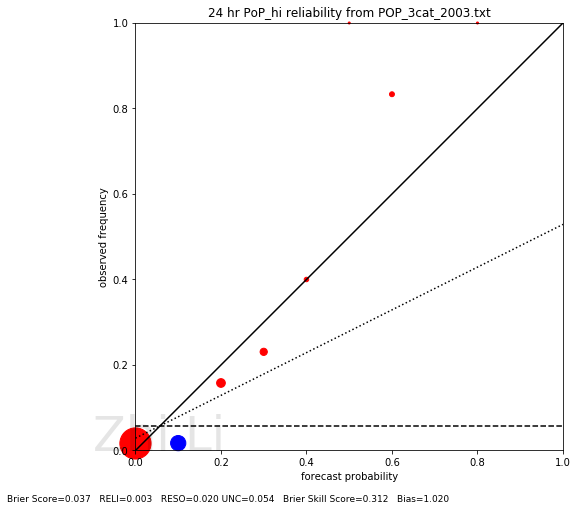

In [15]:
# Plot the reliability diagram
quick, simple = plt.subplots(figsize=(8,8))

caption_form="Brier Score={0:5.3f}   RELI={1:5.3f}   RESO={2:5.3f} \
UNC={3:5.3f}   Brier Skill Score={4:5.3f}   Bias={5:5.3f}"

caption_string=caption_form.format(bs,reli,reso,unc,bss,bias)
print(caption_string)
dotsize = [dotmult*x for x in nobs] # make dot area proportional to number of obs 
simple.scatter(pops,freqs,s=dotsize,c=colors,clip_on=False)
simple.plot([0.,1.],[obar,obar],'k--') # climatology forecast
simple.plot([0.,1.],[0,1],'k-') # probability forecast
simple.plot([0.,1.],[obar/2., (1+obar)/2.],'k:') # no skill line
simple.set_aspect('equal')
simple.set_xlim([0,1]) # note xlim([0,1]) also works
simple.set_ylim([0,1])
simple.set_title('24 hr PoP reliability from '+filename)
if not Brooks:
    if highprecip: simple.set_title('24 hr PoP_hi reliability from '+filename)
simple.set_ylabel('observed frequency')
simple.set_xlabel('forecast probability')
simple.text( -.3, -.12, caption_string, fontsize=9, transform=simple.transAxes) 
# http://wiki.scipy.org/Cookbook/Matplotlib/Transformations
signature="Zhi Li" 
simple.text(-.1,0.,signature,fontsize=48, alpha=.1, transform = simple.transAxes) #DONE
plt.tight_layout()
# quick.savefig('reliability_task3.png',dpi=dpi)


# Receiver Operating Characteristic

The reason for the name *Receiver Operating Characteristic* is a bit obscure in the application to weather forecasts. But in meteorology we  commonly refer to the ROC curve. In the plot below, the threshold probability for the various points is labeled. I think such labels make the ROC curve far more useful and understandable.

Here is what ROC is all about. You make a binary decision based on the expectation of rainfall. Suppose for your activity, you assume the threshold PoP is 0.65. That means for PoP>.65 you take action with the presumption that rain will occur. For PoP<.65 you presume no rain will occur. The curve shows the benefits of using the forecast. A point above the diagonal shows skill. Verifying observations that are always just climatology, independent of the forecasted PoP, would yield results  along the diagonal. (Assuming the observations obey climatology). Note the threshold with label of -.001, which is exceeded on all days. The threshold of 1.001 is never exceeded.

A larger area under the ROC curve implies your forecast system is more skillful.

Note the definitions:

 * Hit rate: true positives/(true positives + missed positives)
 * False Alarm Rate: false alarms/(true negatives + false alarms) 

In [16]:
# computations for ROC plot  and Relative Value plot
climo = obar 
thresholds=[] # initialize empty lists
hitrates=[] 
farates=[] 
ks = sorted(verif.keys()) # all the PoP percents
cls=[n/100. for n in range(1,100) ] # C/L's for relative value curves
rvs=[] # will be list of lists, each list defines a curve for a given C/L
# from Wilks Fig 7.1: a=hits   b=false positives c=misses  d=true negatives
#for k in [-5.01]+ks[:-1]+[100.0001]: # ignore last key, it cannot be a threshold
for k in [-5.1]+ks[:] : # -5.1 makes the first threshold=-.001
    a = 0
    b = 0
    c = 0
    d = 0
    n = 0
# thresholds will be stored as decimal for plot labels. thresholds halfway between keys
    threshold=k/100.+.05 #  .05 is arbitrary ... could be .01 - .09
    if threshold>1.: threshold=1.001 # looks nicer in ROC label
    thresholds.append(threshold) #used only for labels
    for m in ks:
        q=verif[m] # list of 1s and 0s
        lq=len(q) # number of events
        sq=sum(q) # number of positive events (1s) 
        n += lq
        if m<=k: # the PoP is less than the threshold, forecast no rain
            c += sq # misses
            d += lq - sq # true negatives
        else: # the PoP is above the threshold, forecast rain
            a += sq # hits
            b += lq - sq # false detections
# Wilks page 324, Value Score
# EE means expected expense
# C is cost (in dollars)
# L is loss (in dollars)
# EE_perfect= C*climo 
# if cl<=climo, take action on all days: EE_clim = C 
# if cl>=climo, do nothing based on climo: EE_clim = L*climo 
# EE_forecast: C*a + C*b - L *c
# vs = (EE_forecast - EE_clim)/(EE_perfect - EE_clim)
# In the following, all terms are divided by L, so you see ratio cl=C/L
    rv=[] # will be a list of value score, for the threshold
    n=float(n) # needed for python2, otherwise integer divide yields 0
    for cl in cls:
        if cl<climo: 
            vs = ( cl*( a/n + b/n) + c/n  -cl )/( cl*climo - cl )   
        else:
            vs = ( cl*( a/n + b/n) + c/n - climo )/( cl*climo - climo)
        rv.append(vs)
    rvs.append(rv) # append completed list         
    hitrates.append( float(a)/(a+c) )
# see Wilks 7.11 and 7.13 for distinction between FA rate and ratio!!
#    farates.append( float(b)/(a+b) ) # false alarm RATIO, not correct for RoC
    farates.append( float(b)/(d+b) ) # false alarm RATE,  correct for RoC curve
area=0. # initialize computation of area under ROC curve, bigger area -> better forecasts
for n in range( len(hitrates) -1 ):
    area += -.5*(hitrates[n+1]+hitrates[n])*(farates[n+1]-farates[n])
areaf= "%5.4f" % area # will be included in plot title
#print(farates,hitrates)

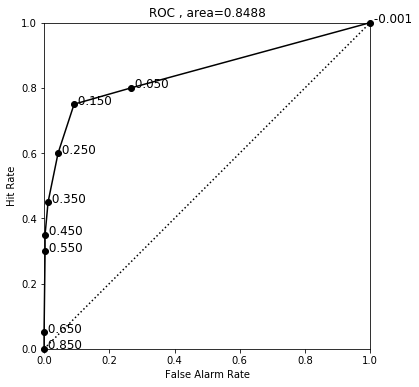

In [17]:
# plot ROC curve
mfig, ax = plt.subplots(figsize=(6,6))
ax.plot(farates,hitrates,'ok-',clip_on=False)
ax.plot([0.,1.],[0,1],'k:')
ax.set_title('ROC , area='+areaf)
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Hit Rate')
ax.set_aspect('equal') # square plot
ax.set_xlim([0,1])
ax.set_ylim([0,1])
i=0
for x,y in zip(farates,hitrates):
    thresh = ' %5.3f' % thresholds[i]
    ax.text(x,y,thresh,fontsize=12) # label each point in ROC with threshold
    i+=1
# mfig.savefig('ROC.png',dpi=dpi)

# Relative Value Curves

Which threshold in PoP should trigger an action?

Relative value curves show the economic value of your binary decisions, based on the thresholds that were also used for the ROC. 

For example, if your cost is C=\$6  to bring an umbrella when you expect rain, and your loss is L=\$10$ when it rains on you without your umbrella, your C/L ratio is 0.6. At 0.6, you can see that your maximum Relative Value is about 0.2. The red envelope curve is coincident with the curve labeled 0.750. So the maximum economic benefit occurs if you use a PoP of 75% for your threshold. This means you should bring your umbrella only when the PoP is forecasted to be 80%, 90% or 100%. The Relative Value of 20% means the economic benefit of using these imperfect forecasts is 20% of the value of perfect forecasts. 


Relative value curves
m= 0    threshold= -0.001   max rv= -0.000
m= 1    threshold= 0.050   max rv= 0.522
m= 2    threshold= 0.150   max rv= 0.654
m= 3    threshold= 0.250   max rv= 0.555
m= 4    threshold= 0.350   max rv= 0.437
m= 5    threshold= 0.450   max rv= 0.347
m= 6    threshold= 0.550   max rv= 0.297
m= 7    threshold= 0.650   max rv= 0.050
m= 8    threshold= 0.850   max rv= -0.000


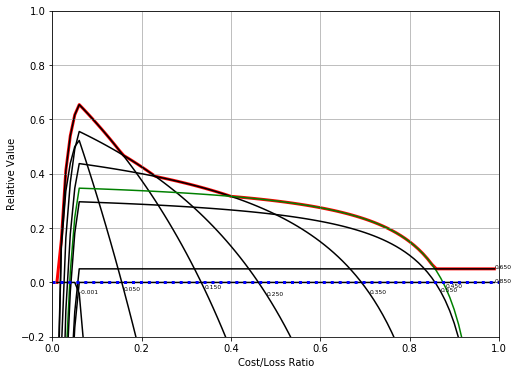

In [18]:
# plot relative value curves
thefig, bx = plt.subplots(figsize=(8,6)) 
rvmax=[] # list for envelope curve
for i in range(len(rvs[0])): # cycle through each C/L
    rvmax.append( max([ rv[i]  for rv in rvs]) ) # max at the C/L
m=0
print("\nRelative value curves")
for rv in rvs: # plot relative value curve for each threshold
    thresh = '%5.3f' % thresholds[m]
    maxrv = '%5.3f' % max(rv)
    print("m=",m,"   threshold=",thresh,"  max rv=",maxrv)
    if m==5:   
        bx.plot(cls,rv,'g-') # green for threshold=.45 is of interest here
    else:
        bx.plot(cls,rv,'k-') 
    xy = list(zip(cls,rv)) #prepare to make labels
    xy.reverse() # (x,y) coordinates are now from right to left
    for x,y in xy :
        if y>-.05: # put label at first x point from right where y>-.05 
            bx.text(x,y,thresh,fontsize=6) # label each curve with threshold
            break #stop looking for place to put label
    m+=1

bx.plot(cls,rvmax,'r-',lw=3,zorder=0) #red envelope; zorder=0 puts it under other curves
bx.plot([0.,1.],[0,0],'b:',lw=3)
bx.set_xlim( [0,1] ) # shortcut for axes().set_xlim([0,1])
bx.set_ylim( [-.2,1] )
bx.set_xlabel("Cost/Loss Ratio")
bx.set_ylabel("Relative Value")
bx.grid(True)
# thefig.savefig('RelaVal.png',dpi=dpi)

<hr style="height:6px;border:none;background-color:#f00;" />
## Appendix

Here are some clean functions that may be useful to you. Both accept a Python dictionary with keys as floating poing probabilities (or percents) and values as lists of ones and zeros.

I don't use these functions in this notebook, but will keep them here for future use.

In [19]:
def calcobar(po): 
    eventsum = 0
    nsum = 0
    for q in po.values():
        nsum += len(q) # number of obs
        eventsum += sum(q) # number of 1's
    return eventsum/nsum

def BS2(po,percent=False):
    reso = 0
    reli = 0
    nsum = 0
    obar = calcobar(po)
    for k,q in po.items():
        p = k
        if percent: 
            p = p/100
        nobk = len(q) # number of obs
        neventk = sum(q) # number of 1's
        if nobk == 0: continue # skip if no days were forecast for this PoP
        freq = neventk / nobk # frequency of occurence
        reli += nobk*(p-freq)**2  # increment reliability 
        reso += nobk*(freq-obar)**2 # increment resolution
        nsum += nobk
    unc = obar*(1-obar) # uncertainty term
    reli = reli/nsum # reliability term
    reso = reso/nsum # resolution term
    bs2 = reli - reso + unc
    bss = 1. - bs2/reli
    return (bs2,reli,reso,unc)  #Done    

In [20]:
thedata = verif # try thedata=notsuref , or thedata=verif
bs = BS(thedata,percent=True)
print ("The Brier score using BS:",  '%0.4f' % bs )
bs2 = BS2(thedata,percent=True) 
print("The Brier score and deompostion using BS2:",bs2)
print ("The Brier score using BS2:",  '%0.4f' % bs2[0] )

The Brier score using BS: 0.0375
The Brier score and deompostion using BS2: (0.037456647398843926, 0.0033981028040757128, 0.020403682676440313, 0.05446222727120853)
The Brier score using BS2: 0.0375


<hr style="height:6px;border:none;background-color:#f00;" />
## Student Tasks

The student tasks here emphasize the Reliability Diagram. Though ability with ROC curves and RV curves is valuable, no tasks have been formulated about ROC and RV. All the student tasks are completed with simple modifications in the cell begining with `verif = {} #initialize empty dictionary`. But read below for the definition of the tasks.

### 1. Bias Score

A definition of bias score for binary forecasts such as these (e.g. rain or does not rain) 
can be found [here](http://www.cawcr.gov.au/projects/verification/verif_web_page.html#BIAS). Scan for word `STUDENT`
in this notebook to finish the coding for the calculation of the bias score for the forecasts, and include it in the image like the one below.

<img src="http://metr4330.net/img/reliability_with_bias.png" width=500 >

-[x] Compeleted!

### 2. The 24 hr high PoP >= 4.5 mm

Now reproduce the analysis of the 24 hr PoPhi forecasts as described at [Verifying probability of precipitation - an example from Finland](http://www.cawcr.gov.au/projects/verification/POP3/POP3.html)

The goal is to produce this image: 

<img src="http://metr4330.net/img/reliability_hi.png" width=500>

### 3. The Brooks et al. data set 

Here we use an alternative [Brooks et al. data set](http://www.nssl.noaa.gov/users/brooks/public_html/media/pop.html)

Scan through the file. There seems to be no issues with missing data.

Download and save the file into your notebook directory.  You should edit the file, and remove the html and text at the beginning and end. You should rename the file. 

But read the text at the beginning before you delete it! That has the information you need to configure the code marked with `#STUDENT`.

Here is the publication describing the analysis:

[Verification of Public Weather Forecasts Available via the Media](http://tinyurl.com/BrooksWittEilts) by Harold E. Brooks, Arthur Witt, and Michael D. Eilts

Note this figure, in particular the image on the left, with the black data points `FS#2`:

<img src="http://metr4330.net/img/BrooksWittEilts.png" width=700>

 * For your education, you may want to reproduce the above Brooks et al. image as 4 separate reliability diagrams.
 * But to pass this sub-task 3, you need to *submit only one reliability diagram*, the `FS#2 D1` diagram:

This is what you are shooting for:
<img src="http://metr4330.net/img/reliability_Brooks.png" width=500>


In [27]:
def cal_obar(f):
    nr=0
    nf=0
    nt=0
    bs=0
    for key in f.keys():
        pop= f[key]
        for i, each in enumerate(pop):
            nt+= 1
            nr+= each
            nf+= key
            
    return nr/nt

In [28]:
obar= cal_obar(f)

In [25]:
def calcbias(f):
    nr=0
    nf=0
    nt=0
    bs=0
    obar= cal_obar(f)
    for key in f.keys():
        pop= f[key]
        for i, each in enumerate(pop):
            nt+= 1
            nr+= each
            nf+= key
            bs+= (key-each)**2
            bsref += (obar-each)**2
            
    return nf/nr

In [26]:
contest = {

'af' : {0.0: [1,0,0,0] , 1.0:[0,1,1,1] },

'bf' :{0.25: [1,0,0,0] , .75:[0,1,1,1] },

'cf' :{0.4: [1,0,0,0,0,1,1,1] },

'df' : {0.25: [0,0,0] , 1.0:[1,1,1,1,0] },

'ef' : {0.25: [0,0,0,0] , .75:[1,1,1,1] },

'pf' : {0.0: [0,0,0,0] , 1.0:[1,1,1,1] },

'rf' :{1.0: [1,0,0,0,0,1,1,1] },

}

nf=0 
nr=0

for i in sorted(contest.keys()):

    f = contest[i]
    

    print (i, BS2(f), calcbias(f) )

af (0.25, 0.0625, 0.0625, 0.25) 1.0
bf (0.1875, 0.0, 0.0625, 0.25) 1.0
cf (0.26, 0.009999999999999995, 0.0, 0.25) 0.7999999999999999
df (0.14843749999999997, 0.04843749999999999, 0.15000000000000002, 0.25) 1.4375
ef (0.0625, 0.0625, 0.25, 0.25) 1.0
pf (0.0, 0.0, 0.25, 0.25) 1.0
rf (0.5, 0.25, 0.0, 0.25) 2.0
